In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.txt", sep = "\t")
df

,ACDATE,ETXEUR,GRXEUR,HKXHKD,NSXUSD,SPXUSD,US2000USD,US30USD,CORNUSD,NATGASUSD,...,WHEATUSD,WTIUSD,XAGEUR,XAUEUR,XAUUSD,XAUXAG,XCUUSD,XPTUSD,XPDUSD,EURUSD
0,2015-01-02 00:00:00,3127.50,9792.00,23646.000,4248.1300,2059.1250,1215.8435,17879.40,3.8675,3.0585,...,5.8250,54.575,13.08645,981.8650,1186.955,75.0365,2.84587,1212.0280,796.845,1.20870
1,2015-01-04 00:00:00,3123.50,9738.25,23675.000,4204.2500,2040.1250,1193.1125,17734.50,3.9565,3.0715,...,5.7525,52.235,13.19072,991.0750,1184.095,75.1310,2.82985,1201.3940,794.234,1.19470
2,2015-01-06 00:00:00,3017.50,9517.75,23351.500,4105.5000,1997.1250,1163.1040,17365.90,3.8745,2.9125,...,5.9010,47.945,13.86317,1024.5850,1216.555,73.9035,2.77982,1217.8700,803.176,1.18724
3,2015-01-08 00:00:00,3106.50,9807.25,24101.000,4232.5000,2054.1250,1194.7240,17868.00,3.8585,2.8995,...,5.6365,49.325,13.88403,1024.5450,1208.275,73.7950,2.78792,1219.2430,791.785,1.17920
4,2015-01-11 00:00:00,3043.50,9660.75,24023.500,4197.3750,2033.6250,1182.7045,17683.50,3.9375,2.9000,...,5.6020,47.705,14.01936,1032.6350,1225.705,73.6600,2.77392,1232.5600,802.306,1.18698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,2019-12-19 00:00:00,3750.45,13230.65,27825.469,8649.6995,3207.9000,1671.3150,28434.65,3.7645,2.2705,...,5.4440,59.765,15.33368,1329.2110,1478.530,86.6855,2.80722,935.0780,1939.150,1.10823
793,2019-12-22 00:00:00,3779.80,13317.90,28037.270,8693.0005,3225.1500,1673.0050,28531.35,3.7870,2.2465,...,5.4255,59.765,15.52540,1334.5340,1478.595,85.9560,2.78985,918.1395,1832.685,1.10803
794,2019-12-24 00:00:00,3779.80,13293.70,27882.470,8704.4950,3224.7995,1679.5350,28554.90,3.7920,2.2110,...,5.3785,59.765,16.01103,1351.3100,1499.790,84.3990,2.82318,945.8000,1884.635,1.10876
795,2019-12-26 00:00:00,3792.65,13345.50,28033.469,8782.9450,3240.9500,1680.3355,28648.45,3.7880,2.2625,...,5.4970,59.765,16.14106,1361.3535,1511.290,84.3410,2.83331,947.7620,1903.500,1.11780


In [3]:
arr_X = []
arr_Y = []
X_train = []
y_train = []

In [4]:
X_train_init = df.drop(["ACDATE", "EURUSD"], 1)
y_train_init = df["EURUSD"]

In [5]:
X_train_init.head()

,ETXEUR,GRXEUR,HKXHKD,NSXUSD,SPXUSD,US2000USD,US30USD,CORNUSD,NATGASUSD,SOYBNUSD,SUGARUSD,WHEATUSD,WTIUSD,XAGEUR,XAUEUR,XAUUSD,XAUXAG,XCUUSD,XPTUSD,XPDUSD
0,3127.5,9792.00,23646.0,4248.130,2059.125,1215.8435,17879.4,3.8675,3.0585,10.2320,0.13661,5.8250,54.575,13.08645,981.865,1186.955,75.0365,2.84587,1212.028,796.845
1,3123.5,9738.25,23675.0,4204.250,2040.125,1193.1125,17734.5,3.9565,3.0715,10.0540,0.13412,5.7525,52.235,13.19072,991.075,1184.095,75.1310,2.82985,1201.394,794.234
2,3017.5,9517.75,23351.5,4105.500,1997.125,1163.1040,17365.9,3.8745,2.9125,10.5335,0.14117,5.9010,47.945,13.86317,1024.585,1216.555,73.9035,2.77982,1217.870,803.176
3,3106.5,9807.25,24101.0,4232.500,2054.125,1194.7240,17868.0,3.8585,2.8995,10.4740,0.14091,5.6365,49.325,13.88403,1024.545,1208.275,73.7950,2.78792,1219.243,791.785
4,3043.5,9660.75,24023.5,4197.375,2033.625,1182.7045,17683.5,3.9375,2.9000,10.4850,0.14221,5.6020,47.705,14.01936,1032.635,1225.705,73.6600,2.77392,1232.560,802.306


In [6]:
y_train_init

0      1.20870
1      1.19470
2      1.18724
3      1.17920
4      1.18698
        ...   
792    1.10823
793    1.10803
794    1.10876
795    1.11780
796    1.11814
Name: EURUSD, Length: 797, dtype: float64

In [7]:
arr_X = X_train_init.copy()
arr_Y = y_train_init.copy()
arr_X = arr_X[1:]
arr_Y = arr_Y[:-1]
arr_X

,ETXEUR,GRXEUR,HKXHKD,NSXUSD,SPXUSD,US2000USD,US30USD,CORNUSD,NATGASUSD,SOYBNUSD,SUGARUSD,WHEATUSD,WTIUSD,XAGEUR,XAUEUR,XAUUSD,XAUXAG,XCUUSD,XPTUSD,XPDUSD
1,3123.50,9738.25,23675.000,4204.2500,2040.1250,1193.1125,17734.50,3.9565,3.0715,10.0540,0.13412,5.7525,52.235,13.19072,991.0750,1184.095,75.1310,2.82985,1201.3940,794.234
2,3017.50,9517.75,23351.500,4105.5000,1997.1250,1163.1040,17365.90,3.8745,2.9125,10.5335,0.14117,5.9010,47.945,13.86317,1024.5850,1216.555,73.9035,2.77982,1217.8700,803.176
3,3106.50,9807.25,24101.000,4232.5000,2054.1250,1194.7240,17868.00,3.8585,2.8995,10.4740,0.14091,5.6365,49.325,13.88403,1024.5450,1208.275,73.7950,2.78792,1219.2430,791.785
4,3043.50,9660.75,24023.500,4197.3750,2033.6250,1182.7045,17683.50,3.9375,2.9000,10.4850,0.14221,5.6020,47.705,14.01936,1032.6350,1225.705,73.6600,2.77392,1232.5600,802.306
5,3068.50,9779.50,24391.500,4160.6300,2016.8750,1181.1155,17590.80,3.7465,2.9350,10.0430,0.14194,5.4505,46.035,14.49548,1047.1250,1233.155,72.2390,2.62737,1243.6070,816.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,3750.45,13230.65,27825.469,8649.6995,3207.9000,1671.3150,28434.65,3.7645,2.2705,9.2095,0.13148,5.4440,59.765,15.33368,1329.2110,1478.530,86.6855,2.80722,935.0780,1939.150
793,3779.80,13317.90,28037.270,8693.0005,3225.1500,1673.0050,28531.35,3.7870,2.2465,9.2565,0.13137,5.4255,59.765,15.52540,1334.5340,1478.595,85.9560,2.78985,918.1395,1832.685
794,3779.80,13293.70,27882.470,8704.4950,3224.7995,1679.5350,28554.90,3.7920,2.2110,9.2920,0.13093,5.3785,59.765,16.01103,1351.3100,1499.790,84.3990,2.82318,945.8000,1884.635
795,3792.65,13345.50,28033.469,8782.9450,3240.9500,1680.3355,28648.45,3.7880,2.2625,9.3355,0.13059,5.4970,59.765,16.14106,1361.3535,1511.290,84.3410,2.83331,947.7620,1903.500


In [8]:
arr_Y

0      1.20870
1      1.19470
2      1.18724
3      1.17920
4      1.18698
        ...   
791    1.11512
792    1.10823
793    1.10803
794    1.10876
795    1.11780
Name: EURUSD, Length: 796, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(arr_X, arr_Y, test_size=len(arr_X)//5, random_state=13)

In [10]:
params = {'n_estimators': 1200,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**(params))
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1200)

In [11]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.6f}".format(mse))
r2 = r2_score(y_test, reg.predict(X_test))
print("The R2 score on the test set is: {:.6f}".format(r2))

The mean squared error (MSE) on test set: 0.000105
The R2 score on the test set is: 0.942172


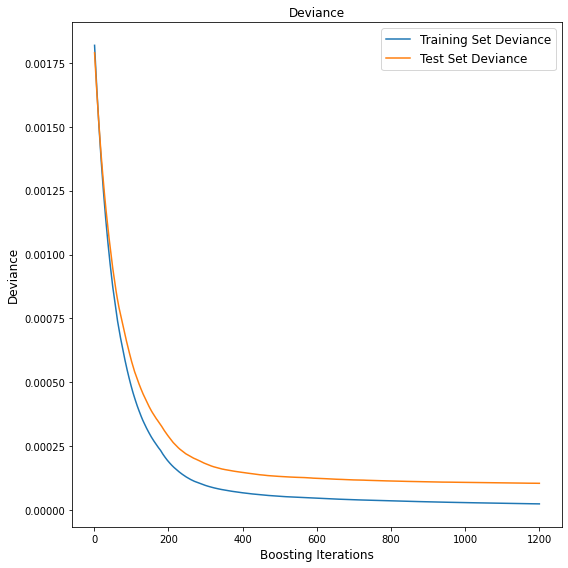

In [12]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 
         label='Test Set Deviance')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Boosting Iterations' , fontsize=12)
plt.ylabel('Deviance', fontsize=12)
fig.tight_layout()
plt.savefig("Training_result.png")
plt.show()

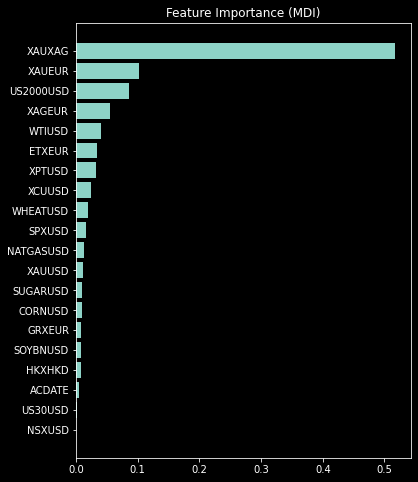

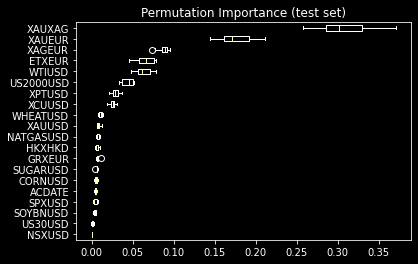

In [30]:
names = df.columns
feature_importance = reg.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(6, 8))
# plt.subplot(1, 2, 1)
plt.barh(
    pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(names)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.savefig("variable_importance_MDI.png")
plt.show()

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
# plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.savefig("variable_importance.png")
plt.show()

In [14]:
test_err = y_test - reg.predict(X_test)

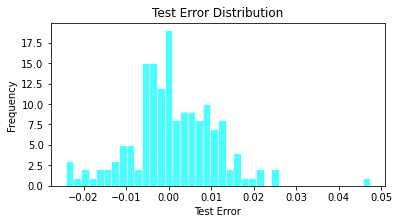

In [15]:
fig = plt.figure(figsize=(6, 3))
plt.hist(test_err, bins=40, facecolor="cyan", edgecolor="white", alpha=0.7) #  
plt.xlabel("Test Error")
plt.ylabel("Frequency")
plt.title("Test Error Distribution")
plt.savefig('err_distribution.png')
plt.show()

In [16]:
import scipy
import statsmodels.api as sm

In [17]:
sm.stats.diagnostic.normal_ad(test_err, axis=0)

(0.8185537907847618, 0.033732284861447644)

In [18]:
test_err.mean()

0.001061741188551364

In [19]:
test_err.var()

0.00010442283633536256

In [20]:
test_err

147   -0.022389
215    0.008118
192   -0.017619
713    0.011791
46    -0.019450
         ...   
246   -0.001608
251   -0.003677
172    0.007175
196   -0.001085
347   -0.012611
Name: EURUSD, Length: 159, dtype: float64

In [21]:
time_series = pd.to_datetime(df["ACDATE"])[1:]

In [22]:
x_axis = time_series[400:500]
y_true = arr_Y[400:500]
y_pred = reg.predict(arr_X)[400:500]

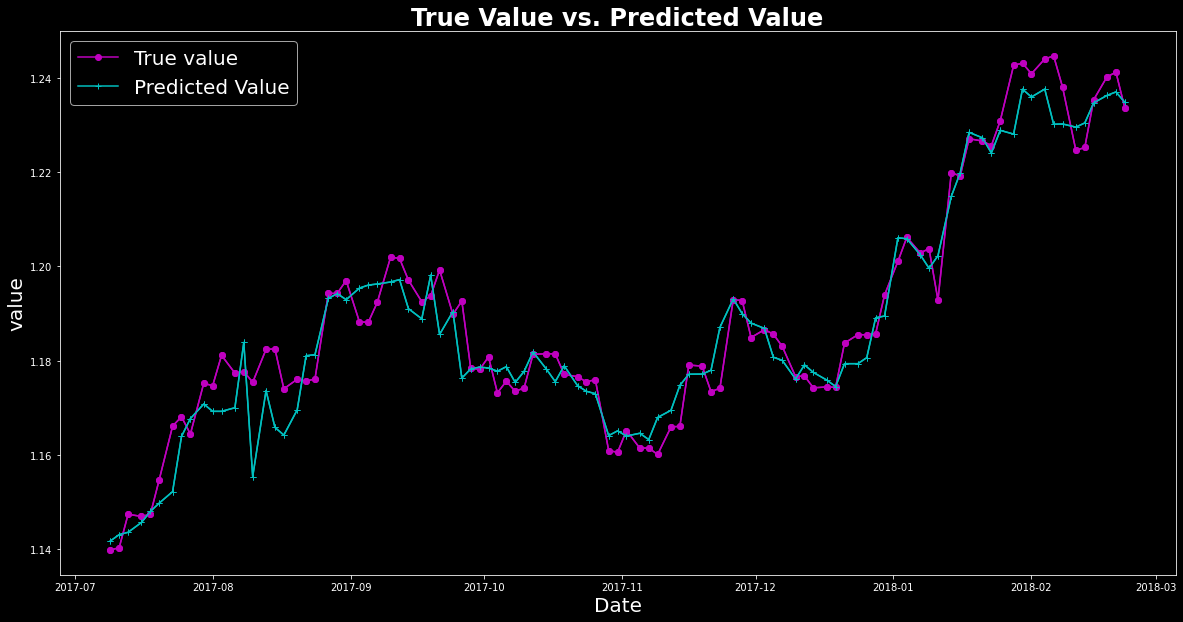

In [23]:
plt.style.use('dark_background')

fig2 = plt.figure(figsize=(20, 10))
# plt.subplot(3, 1, 3)
l1=plt.plot(x_axis,y_true,'mo-',label='True value')
l2=plt.plot(x_axis,y_pred,'c+-',label='Predicted Value')
plt.plot(x_axis,y_true,'mo-',x_axis,y_pred,'c+-')
plt.title('True Value vs. Predicted Value', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize=20)
plt.ylabel('value', fontsize=20)
plt.legend(fontsize=20)

plt.savefig('trend.png',pad_inches=0.5,bbox_inches='tight')
plt.show()

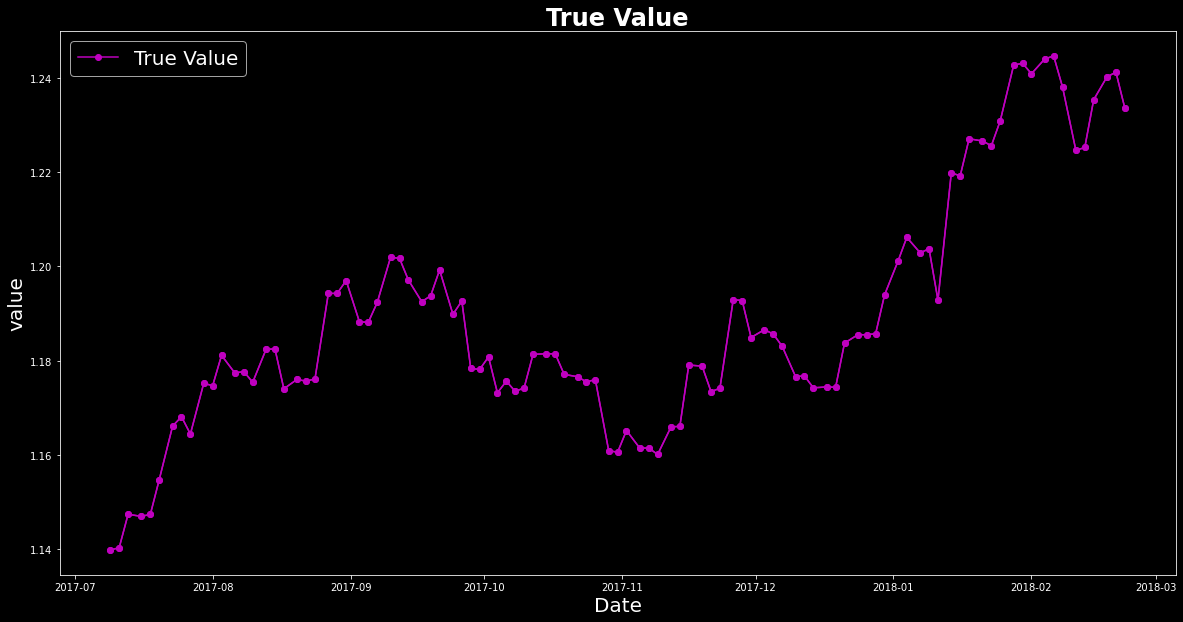

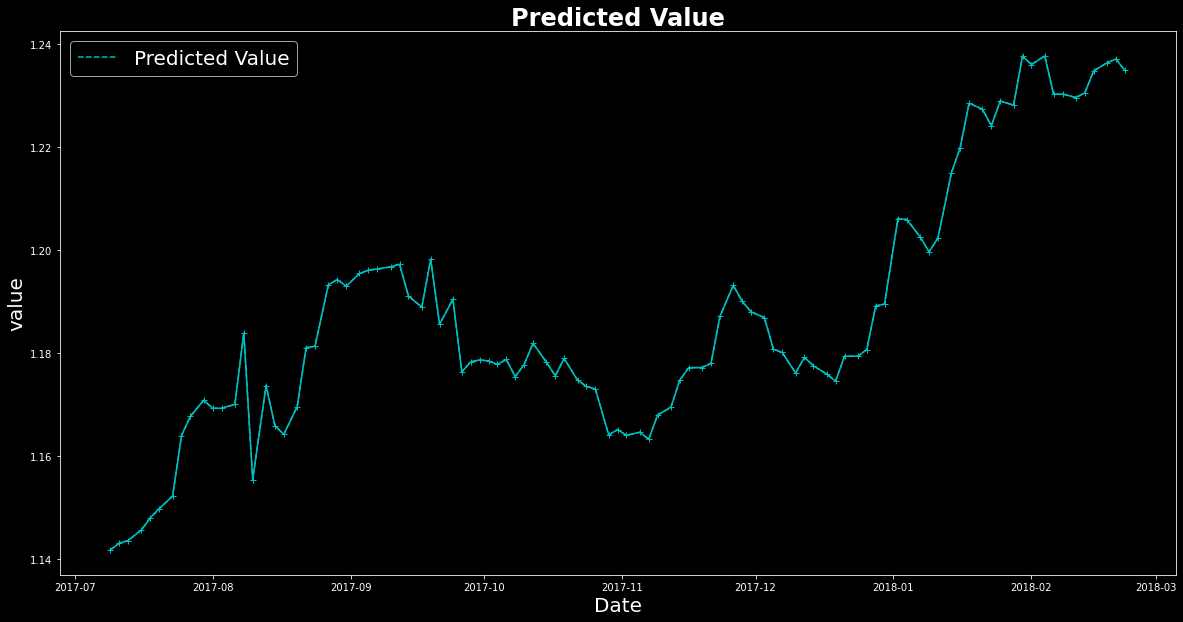

In [24]:
# plt.subplot(3, 1, 1)
fig2 = plt.figure(figsize=(20, 10))
l1=plt.plot(x_axis,y_true,'mo-',label='type1')
plt.plot(x_axis,y_true,'mo-')
plt.title('True Value', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize=20)
plt.ylabel('value', fontsize=20)
plt.legend(labels=["True Value"], fontsize=20)
plt.savefig('trend2.png',pad_inches=0.5,bbox_inches='tight')
plt.show()
# plt.subplot(3, 1, 2)

fig2 = plt.figure(figsize=(20, 10))
l2=plt.plot(x_axis,y_pred,'c--',label='type2')
plt.plot(x_axis,y_pred,'c+-')
plt.title('Predicted Value', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize=20)
plt.ylabel('value', fontsize=20)
plt.legend(labels=["Predicted Value"],fontsize=20)
plt.savefig('trend3.png',pad_inches=0.5,bbox_inches='tight')
plt.show()